In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('C:/Users/ss/Downloads/default of credit card clients.csv', encoding='cp949', header=1)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [123]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1]

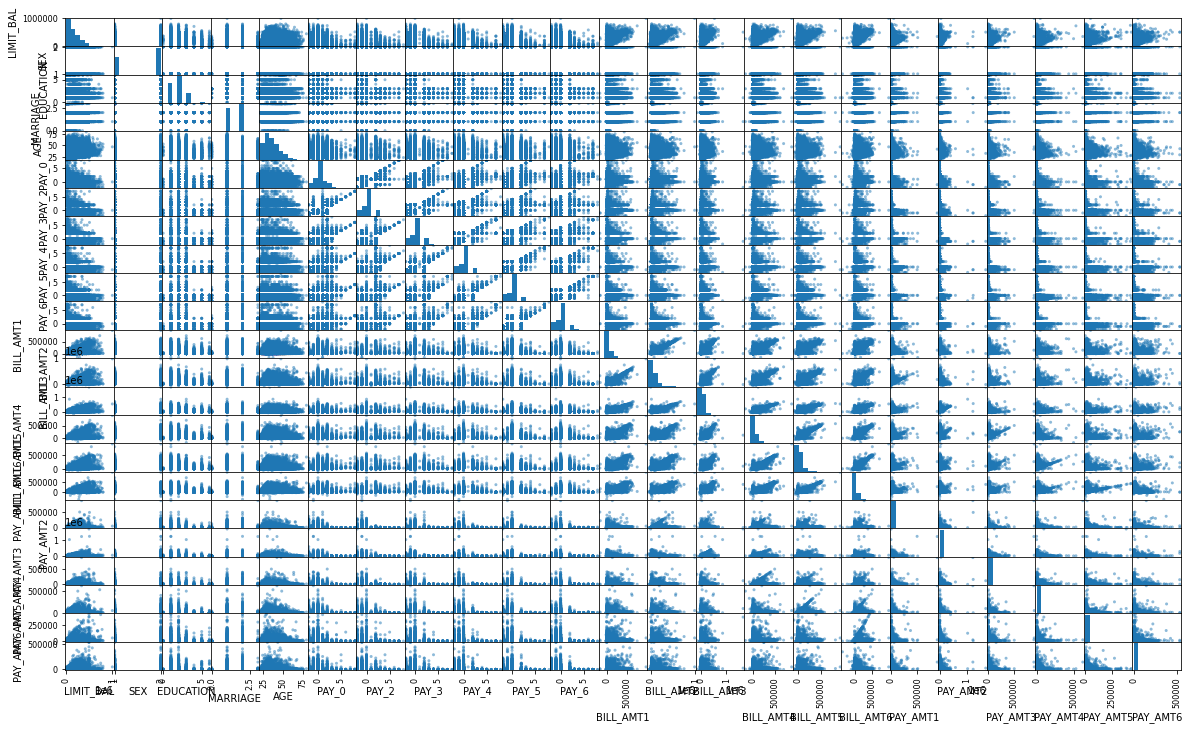

In [26]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(data,figsize=(20,12))
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss = StandardScaler()

In [124]:
data = ss.fit_transform(data)

In [38]:
from sklearn.decomposition import PCA

In [184]:
pca_temp = PCA()
pca_temp.fit(data)
cumsum = np.cumsum(pca_temp.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1

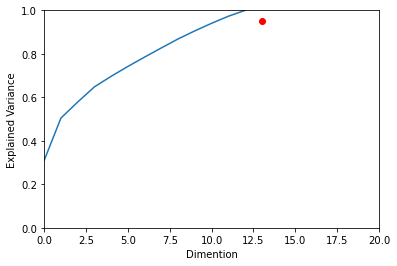

In [188]:
plt.plot(cumsum)
plt.plot(pca.n_components_, 0.95, 'ro')
plt.axis([0,20, 0, 1])
plt.xlabel('Dimention')
plt.ylabel('Explained Variance')
plt.show()

In [135]:
pca = PCA(n_components=0.95)

In [136]:
data = pca.fit_transform(data)

In [137]:
pca.explained_variance_

array([6.54330745, 4.09846452, 1.55101233, 1.4723145 , 1.02527213,
       0.95723146, 0.9076182 , 0.88764591, 0.87127841, 0.78295576,
       0.73281262, 0.68284393, 0.57096763])

In [177]:
pca.explained_variance_ratio_

array([0.29726381, 0.18619409, 0.07046281, 0.06688755, 0.04657833,
       0.04348722, 0.04123328, 0.04032594, 0.03958236, 0.03556984,
       0.03329183, 0.03102174, 0.02593918])

In [175]:
pca.n_components_

13

In [139]:
pcaDF = pd.DataFrame(data)

In [140]:
pcaDF.shape

(30000, 13)

In [141]:
pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147


In [109]:
pca2DF.reset_index(drop=True,inplace=True)
y_train_copy = y_train.reset_index(drop=True)

In [142]:
pcaDF = pd.concat((pcaDF,target),axis=1,ignore_index=True)

In [143]:
pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591,1
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162,1
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953,0
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917,0
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147,0


In [145]:
target0 = pcaDF[target==0]
target1 = pcaDF[target==1]

In [147]:
target0.shape, target1.shape

((23364, 14), (6636, 14))

In [31]:
from sklearn.model_selection import train_test_split

In [148]:
x_train, x_test, y_train, y_test = train_test_split(pcaDF.iloc[:,:-1], pcaDF.iloc[:,-1], test_size=0.2, random_state=42)

In [149]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [150]:
x_train.shape, x_test.shape, x_val.shape

((19200, 13), (6000, 13), (4800, 13))

In [151]:
import tensorflow as tf

In [153]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [167]:
model = Sequential()

In [168]:
model.add(Dense(50, activation='relu', input_shape=(13,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [169]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                700       
                                                                 
 dense_9 (Dense)             (None, 100)               5100      
                                                                 
 dense_10 (Dense)            (None, 150)               15150     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])